In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Initialize lists to store features and labels
features = []
labels = []

# Time settings
T = 100  # Total time
N = 1000  # Number of data points
t = np.linspace(0, T, N)  # Time vector

# Generate multiple sine waves with different characteristics
for freq in np.linspace(0.1, 2, 20):  # Frequency
    for amp in np.linspace(1, 5, 5):  # Amplitude
        for phase in np.linspace(0, np.pi, 5):  # Phase shift
            
            # Generate the sine wave time-series
            y = amp * np.sin(2 * np.pi * freq * t + phase)
            
            features.append(y)
            labels.append(1 / freq)  # Period = 1 / frequency

# Convert lists to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Save as DataFrame (optional)
df = pd.DataFrame(features)
df['Period'] = labels
df.to_csv('sine_wave_dataset.csv', index=False)


In [33]:
df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Period
0,0.000000e+00,0.062853,0.125458,0.187567,0.248934,0.309316,0.368475,0.426178,0.482195,0.536305,...,-0.482195,-0.426178,-0.368475,-0.309316,-0.248934,-0.187567,-0.125458,-0.062853,-2.449294e-15,10.0
1,7.071068e-01,0.750153,0.790232,0.827187,0.860870,0.891149,0.917904,0.941030,0.960434,0.976040,...,0.278508,0.338324,0.396802,0.453710,0.508825,0.561927,0.612808,0.661265,7.071068e-01,10.0
2,1.000000e+00,0.998023,0.992099,0.982252,0.968521,0.950959,0.929638,0.904640,0.876064,0.844024,...,0.876064,0.904640,0.929638,0.950959,0.968521,0.982252,0.992099,0.998023,1.000000e+00,10.0
3,7.071068e-01,0.661265,0.612808,0.561927,0.508825,0.453710,0.396802,0.338324,0.278508,0.217591,...,0.960434,0.941030,0.917904,0.891149,0.860870,0.827187,0.790232,0.750153,7.071068e-01,10.0
4,1.224647e-16,-0.062853,-0.125458,-0.187567,-0.248934,-0.309316,-0.368475,-0.426178,-0.482195,-0.536305,...,0.482195,0.426178,0.368475,0.309316,0.248934,0.187567,0.125458,0.062853,-9.809554e-16,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000000e+00,4.757222,2.928740,-2.954170,-4.747448,0.031447,4.766808,2.903195,-2.979483,-4.737486,...,2.979483,-2.903195,-4.766808,-0.031447,4.747448,2.954170,-2.928740,-4.757222,3.928773e-14,0.5
496,3.535534e+00,4.452174,-0.794594,-4.941358,-2.247508,3.557700,4.437774,-0.825626,-4.946063,-2.219372,...,-0.732437,-4.931363,-2.303511,3.513227,4.466398,-0.763531,-4.936458,-2.275555,3.535534e+00,0.5
497,5.000000e+00,1.539102,-4.052466,-4.033966,1.568992,4.999901,1.509151,-4.070806,-4.015306,1.598820,...,-4.015306,-4.070806,1.509151,4.999901,1.568992,-4.033966,-4.052466,1.539102,5.000000e+00,0.5
498,3.535534e+00,-2.275555,-4.936458,-0.763531,4.466398,3.513227,-2.303511,-4.931363,-0.732437,4.480445,...,-4.946063,-0.825626,4.437774,3.557700,-2.247508,-4.941358,-0.794594,4.452174,3.535534e+00,0.5


In [34]:
from sklearn.model_selection import train_test_split

# Assuming features and labels are your data and target variables
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Baseline Model MSE: {mse}')

Baseline Model MSE: 1.479391957435436


In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Randomized Search
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Best Model
best_model = random_search.best_estimator_

In [37]:
# Evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Optimized Model MSE: {mse}')

Optimized Model MSE: 1.6314147827443322


In [38]:
relative_errors = np.abs((y_test - y_pred) / y_test)
mean_relative_error = np.mean(relative_errors) * 100
print(f"Mean Relative Error: {mean_relative_error}%")

Mean Relative Error: 21.231353257290067%


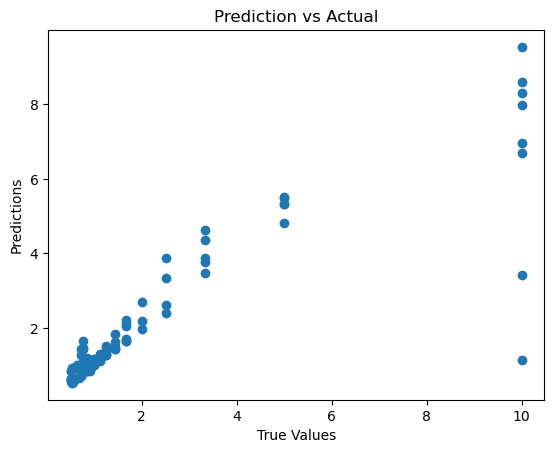

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs Actual')
plt.show()